In [1]:
# Things to do:

# part 1
# Data Wrangling and Handling

# Part 2 
# Dimensionality Reduction

# Part 3
# Model evaluation and Selection for Texture Predicting

# Part 4
# Model evaluation and Selection for Stability Predicting

# PART 1 : DATA WRANGLING

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_excel("dataset.xlsx")

In [4]:
df.head(5)

,Community,SiteID,Site,Rough,Resist,Resist_adjust,Broke,Stab,Biocrust,Biocrust_code,...,Litter_code,Litt_depth,Litt_Origin,Litt_Incorp,Litt_Propn,Litt_Complex,Texture,Stability,Infiltration,Nutrients
0,Cypress pine,CYP_001_000,CYP_001,1,4,1.0,2,4,5.0,2,...,1,3.0,1.5,1.0,95.0,1.5,2,54.107231,20.550760,15.116279
1,Cypress pine,CYP_001_050,CYP_001,1,4,1.0,4,4,20.0,3,...,2,4.0,1.5,1.0,30.0,3.0,2,63.944909,22.605836,20.930233
2,Cypress pine,CYP_001_100,CYP_001,1,4,1.0,4,4,10.0,2,...,2,0.5,1.5,1.0,100.0,3.0,2,63.944909,20.550760,16.279070
3,Cypress pine,CYP_001_150,CYP_001,1,4,1.0,4,3,20.0,3,...,1,0.5,1.5,1.0,100.0,1.5,2,59.026070,16.440608,15.116279
4,Cypress pine,CYP_001_200,CYP_001,1,4,1.0,3,4,30.0,3,...,1,1.0,1.5,1.0,100.0,1.5,2,56.566650,18.495684,15.116279


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2255 entries, 0 to 2254
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Community      2255 non-null   object 
 1   SiteID         2255 non-null   object 
 2   Site           2255 non-null   object 
 3   Rough          2255 non-null   int64  
 4   Resist         2255 non-null   int64  
 5   Resist_adjust  2255 non-null   float64
 6   Broke          2255 non-null   int64  
 7   Stab           2255 non-null   int64  
 8   Biocrust       2255 non-null   float64
 9   Biocrust_code  2255 non-null   int64  
 10  Erosion        2255 non-null   int64  
 11  Deposit        2255 non-null   int64  
 12  Foliage        2255 non-null   float64
 13  Foliage_code   2255 non-null   int64  
 14  Basal          2255 non-null   float64
 15  Litter%        2255 non-null   float64
 16  Litter_code    2255 non-null   int64  
 17  Litt_depth     2255 non-null   float64
 18  Litt_Ori

In [6]:
df.shape

(2255, 26)

In [7]:
df.dtypes

Community         object
SiteID            object
Site              object
Rough              int64
Resist             int64
Resist_adjust    float64
Broke              int64
Stab               int64
Biocrust         float64
Biocrust_code      int64
Erosion            int64
Deposit            int64
Foliage          float64
Foliage_code       int64
Basal            float64
Litter%          float64
Litter_code        int64
Litt_depth       float64
Litt_Origin      float64
Litt_Incorp      float64
Litt_Propn       float64
Litt_Complex     float64
Texture            int64
Stability        float64
Infiltration     float64
Nutrients        float64
dtype: object

In [8]:
# Check if there is any NaN in the entire dataframe
df.isna().any().any()

False

In [9]:
# check for any null values
null_value = df.isna() == True
null_value.sum()

Community        0
SiteID           0
Site             0
Rough            0
Resist           0
Resist_adjust    0
Broke            0
Stab             0
Biocrust         0
Biocrust_code    0
Erosion          0
Deposit          0
Foliage          0
Foliage_code     0
Basal            0
Litter%          0
Litter_code      0
Litt_depth       0
Litt_Origin      0
Litt_Incorp      0
Litt_Propn       0
Litt_Complex     0
Texture          0
Stability        0
Infiltration     0
Nutrients        0
dtype: int64

In [10]:
# check for any null values
df.notna().sum()

Community        2255
SiteID           2255
Site             2255
Rough            2255
Resist           2255
Resist_adjust    2255
Broke            2255
Stab             2255
Biocrust         2255
Biocrust_code    2255
Erosion          2255
Deposit          2255
Foliage          2255
Foliage_code     2255
Basal            2255
Litter%          2255
Litter_code      2255
Litt_depth       2255
Litt_Origin      2255
Litt_Incorp      2255
Litt_Propn       2255
Litt_Complex     2255
Texture          2255
Stability        2255
Infiltration     2255
Nutrients        2255
dtype: int64

In [11]:
# Create Function to loop through all the feature unique entries count to check for duplicate entries
def valuecounter (df):
    for column in df.columns:
        count = df[column].value_counts()
        print(f"Value counts for Feature: {column}:\n{count}\n\n")
        
valuecounter(df)

Value counts for Feature: Community:
Cypress pine    755
Blackbox        750
Redgum          750
Name: Community, dtype: int64


Value counts for Feature: SiteID:
CYP_001_000    1
RRG_001_050    1
BLA_201_000    1
BLA_201_050    1
BLA_201_100    1
              ..
CYP_150_000    1
CYP_149_200    1
CYP_149_150    1
CYP_149_100    1
RRG_163_200    1
Name: SiteID, Length: 2255, dtype: int64


Value counts for Feature: Site:
CYP_001    5
RRG_040    5
RRG_008    5
RRG_007    5
RRG_006    5
          ..
CYP_147    5
CYP_146    5
CYP_145    5
CYP_144    5
RRG_163    5
Name: Site, Length: 451, dtype: int64


Value counts for Feature: Rough:
2    1192
3     582
1     384
4      79
5      17
0       1
Name: Rough, dtype: int64


Value counts for Feature: Resist:
2    713
3    601
4    476
5    280
1    185
Name: Resist, dtype: int64


Value counts for Feature: Resist_adjust:
1.00    941
6.66    713
3.33    600
5.00      1
Name: Resist_adjust, dtype: int64


Value counts for Feature: Broke:
4    

In [12]:
# Create a function to Identify Categorical features (features with duplicated values)
def duplicate_Checker(df):
    
#     create empty list
    duplicated_features = []
    nonduplicated_features = []
    
#  loop to identify if feature contains duplicates

    for column in df.columns:
        if df[column].duplicated().any():
            duplicated_features.append(column)
        else:
            nonduplicated_features.append(column)
        
    if duplicated_features:
        print("The Following Features Contain Duplicates:\n")
        for column in duplicated_features:
            print(f" - {column}")
    else:
        print("No duplicated features found")
    print("\n\n")
    if nonduplicated_features:
        print("The Following Features Contain NO Duplicates:\n ")
        for column in nonduplicated_features:
            print(f" - {column}")
    else:
        print("No  non-duplicated features found")
    
        
duplicate_Checker(df)

The Following Features Contain Duplicates:

 - Community
 - Site
 - Rough
 - Resist
 - Resist_adjust
 - Broke
 - Stab
 - Biocrust
 - Biocrust_code
 - Erosion
 - Deposit
 - Foliage
 - Foliage_code
 - Basal
 - Litter%
 - Litter_code
 - Litt_depth
 - Litt_Origin
 - Litt_Incorp
 - Litt_Propn
 - Litt_Complex
 - Texture
 - Stability
 - Infiltration
 - Nutrients



The Following Features Contain NO Duplicates:
 
 - SiteID


In [13]:
# Rough has an abnormal Entry of 0
df[df["Rough"] == 0].set_index("Rough")

,Community,SiteID,Site,Resist,Resist_adjust,Broke,Stab,Biocrust,Biocrust_code,Erosion,...,Litter_code,Litt_depth,Litt_Origin,Litt_Incorp,Litt_Propn,Litt_Complex,Texture,Stability,Infiltration,Nutrients
Rough,,,,,,,,,,,,,,,,,,,,,
0,Blackbox,BLA_034_000,BLA_034,2,6.66,3,4,0.0,0,4,...,2,2.0,1.5,1.0,10.0,3.0,1,68.027545,32.182491,11.627907


In [14]:
# Resist_adjust has an abnormal entry of 5.00
df[df["Resist_adjust"] == 5].set_index("Resist_adjust")

,Community,SiteID,Site,Rough,Resist,Broke,Stab,Biocrust,Biocrust_code,Erosion,...,Litter_code,Litt_depth,Litt_Origin,Litt_Incorp,Litt_Propn,Litt_Complex,Texture,Stability,Infiltration,Nutrients
Resist_adjust,,,,,,,,,,,,,,,,,,,,,
5.0,Cypress pine,CYP_132_100,CYP_132,4,5,2,4,0.0,1,3,...,3,1.0,1.5,1.0,100.0,4.5,2,61.485489,30.826141,24.418605


In [15]:
df[(df["Basal"] < 1) | (df["Basal"] > 4)].set_index("Basal")

,Community,SiteID,Site,Rough,Resist,Resist_adjust,Broke,Stab,Biocrust,Biocrust_code,...,Litter_code,Litt_depth,Litt_Origin,Litt_Incorp,Litt_Propn,Litt_Complex,Texture,Stability,Infiltration,Nutrients
Basal,,,,,,,,,,,,,,,,,,,,,
5.0,Cypress pine,CYP_017_200,CYP_017,5,2,6.66,1,1,0.0,1,...,2,3.0,1.5,1.0,100.0,3.00,2,58.189867,34.237567,32.558140
7.0,Cypress pine,CYP_071_000,CYP_071,1,2,6.66,4,3,10.0,2,...,4,15.0,1.5,1.0,100.0,6.00,2,77.865224,46.568023,37.209302
0.5,Cypress pine,CYP_072_000,CYP_072,2,1,1.00,0,0,0.5,1,...,5,10.0,1.5,1.7,10.0,12.75,2,39.350713,17.468146,37.790698


In [16]:
# Abnormal Litter_code values (above 7)
df[df["Litter_code"] > 7].set_index("Litter_code")

,Community,SiteID,Site,Rough,Resist,Resist_adjust,Broke,Stab,Biocrust,Biocrust_code,...,Litter%,Litt_depth,Litt_Origin,Litt_Incorp,Litt_Propn,Litt_Complex,Texture,Stability,Infiltration,Nutrients
Litter_code,,,,,,,,,,,,,,,,,,,,,
8,Redgum,RRG_010_200,RRG_010,3,2,6.66,2,4,0.0,0,...,100.0,80.0,1.5,1.3,90.0,15.6,1,72.946385,42.457871,45.581395
8,Redgum,RRG_053_200,RRG_053,2,3,3.33,3,4,0.0,0,...,100.0,100.0,1.0,1.7,5.0,13.6,1,62.297098,35.614468,38.604651
8,Redgum,RRG_054_200,RRG_054,2,3,3.33,4,4,0.0,0,...,100.0,100.0,1.0,1.3,1.0,10.4,1,64.756517,35.614468,31.162791
9,Redgum,RRG_058_150,RRG_058,3,5,1.00,4,4,0.0,0,...,100.0,120.0,1.0,2.0,0.1,18.0,1,66.404329,32.881217,51.162791
8,Redgum,RRG_119_150,RRG_119,3,3,3.33,0,3,0.0,0,...,100.0,100.0,1.5,1.3,20.0,15.6,1,57.378259,33.559392,45.581395


In [17]:
# Abnoraml Litt_depth value >=90
df[df["Litt_depth"] >= 90].set_index("Litt_depth")

,Community,SiteID,Site,Rough,Resist,Resist_adjust,Broke,Stab,Biocrust,Biocrust_code,...,Litter%,Litter_code,Litt_Origin,Litt_Incorp,Litt_Propn,Litt_Complex,Texture,Stability,Infiltration,Nutrients
Litt_depth,,,,,,,,,,,,,,,,,,,,,
100.0,Blackbox,BLA_011_100,BLA_011,2,2,6.66,3,2,0.0,0,...,75.000000,4,1.5,1.3,80.0,7.80,1,63.108706,30.127415,25.116279
100.0,Blackbox,BLA_053_100,BLA_053,2,5,1.00,0,0,0.0,0,...,95.238095,5,1.5,1.7,70.0,12.75,1,39.350713,16.440608,36.627907
90.0,Redgum,RRG_003_100,RRG_003,2,5,1.00,3,4,0.0,0,...,80.000000,5,1.5,1.3,0.1,9.75,1,49.188392,24.660912,29.651163
100.0,Redgum,RRG_053_200,RRG_053,2,3,3.33,3,4,0.0,0,...,100.000000,8,1.0,1.7,5.0,13.60,1,62.297098,35.614468,38.604651
100.0,Redgum,RRG_054_200,RRG_054,2,3,3.33,4,4,0.0,0,...,100.000000,8,1.0,1.3,1.0,10.40,1,64.756517,35.614468,31.162791
120.0,Redgum,RRG_058_150,RRG_058,3,5,1.00,4,4,0.0,0,...,100.000000,9,1.0,2.0,0.1,18.00,1,66.404329,32.881217,51.162791
150.0,Redgum,RRG_084_100,RRG_084,3,5,1.00,4,4,0.0,0,...,83.000000,5,1.5,1.3,95.0,9.75,1,61.485489,28.771065,36.627907
100.0,Redgum,RRG_104_200,RRG_104,3,5,1.00,4,4,0.0,0,...,90.000000,5,1.0,1.7,10.0,8.50,1,56.566650,24.660912,29.069767
300.0,Redgum,RRG_107_150,RRG_107,4,3,3.33,4,4,0.0,0,...,60.000000,4,1.5,1.0,0.0,6.00,1,59.837678,27.394164,25.581395


In [18]:
# Abnormal values for Litt_Orgin
df[(df["Litt_Origin"] == 0) | (df["Litt_Origin"] > 2)].set_index("Litt_Origin")

,Community,SiteID,Site,Rough,Resist,Resist_adjust,Broke,Stab,Biocrust,Biocrust_code,...,Litter%,Litter_code,Litt_depth,Litt_Incorp,Litt_Propn,Litt_Complex,Texture,Stability,Infiltration,Nutrients
Litt_Origin,,,,,,,,,,,,,,,,,,,,,
15.0,Cypress pine,CYP_029_150,CYP_029,3,3,3.33,3,4,15.0,3,...,60.0,4,17.0,1.0,10.0,60.0,2,67.215937,31.504316,15.810000
15.0,Cypress pine,CYP_120_150,CYP_120,1,4,1.00,2,4,0.0,1,...,0.0,1,10.0,1.0,100.0,15.0,1,54.107231,16.440608,41.860465
0.0,Blackbox,BLA_148_000,BLA_148,2,1,1.00,0,0,0.0,0,...,80.0,5,5.0,1.0,100.0,0.0,1,39.350713,16.440608,6.976744


In [19]:
# Abnormal Entries for Litt_Incorp
df[(df["Litt_Incorp"] == 0) | (df["Litt_Incorp"] == 0.3)].set_index("Litt_Incorp")

,Community,SiteID,Site,Rough,Resist,Resist_adjust,Broke,Stab,Biocrust,Biocrust_code,...,Litter%,Litter_code,Litt_depth,Litt_Origin,Litt_Propn,Litt_Complex,Texture,Stability,Infiltration,Nutrients
Litt_Incorp,,,,,,,,,,,,,,,,,,,,,
0.3,Cypress pine,CYP_077_150,CYP_077,2,1,1.00,0,0,0.0,1,...,95.0,5,5.0,1.5,25.0,2.25,1,36.891294,16.440608,14.534884
0.0,Blackbox,BLA_013_200,BLA_013,5,2,6.66,1,1,0.0,0,...,5.0,1,3.0,1.5,10.0,0.00,1,48.352189,21.907111,13.953488


In [20]:
# Abnormal Entries for Texture of 3
df[df["Texture"] == 3].set_index("Texture")

,Community,SiteID,Site,Rough,Resist,Resist_adjust,Broke,Stab,Biocrust,Biocrust_code,...,Litter%,Litter_code,Litt_depth,Litt_Origin,Litt_Incorp,Litt_Propn,Litt_Complex,Stability,Infiltration,Nutrients
Texture,,,,,,,,,,,,,,,,,,,,,
3,Cypress pine,CYP_115_000,CYP_115,2,2,6.66,3,3,0.0,1,...,60.0,4,5.0,1.5,1.0,100.0,6.0,72.946385,38.347719,25.581395
3,Cypress pine,CYP_115_050,CYP_115,1,4,1.00,4,3,0.0,1,...,20.0,2,2.0,1.5,1.0,100.0,3.0,59.026070,22.605836,16.279070
3,Cypress pine,CYP_115_100,CYP_115,2,4,1.00,4,3,5.0,2,...,50.0,3,3.0,1.5,1.0,100.0,4.5,61.485489,24.660912,24.418605
3,Cypress pine,CYP_115_150,CYP_115,2,4,1.00,4,4,0.0,1,...,60.0,4,2.0,1.5,1.0,100.0,6.0,61.485489,28.771065,25.581395
3,Cypress pine,CYP_115_200,CYP_115,2,4,1.00,4,4,0.0,1,...,50.0,3,2.0,1.5,1.0,100.0,4.5,59.026070,26.715988,22.093023


In [21]:
# Checking the statistical distribution for Texture.
df["Texture"].describe()

count    2255.000000
mean        1.376940
std         0.701627
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: Texture, dtype: float64

In [22]:
# Checking the number of entries with the max value
df[df["Texture"] == 4].shape[0]

95

In [23]:
# Checking the number of entries with the min value
df[df["Texture"] == 1].shape[0]

1600

In [24]:
# Checking the unique counts for Target 1 (Texture)
df["Texture"].value_counts()

1    1600
2     555
4      95
3       5
Name: Texture, dtype: int64

In [25]:
# Checking the statistical distribution for Stability
df["Stability"].describe()

count    2255.000000
mean       58.323232
std         9.299283
min        17.215937
25%        54.107231
50%        59.026070
75%        64.756517
max        80.324643
Name: Stability, dtype: float64

In [26]:
# Checking the number of entries greater than or equal to max value
df[df["Stability"] >=  80].shape[0]

12

In [27]:
df["Stability"].value_counts()

59.026070    153
56.566650    132
61.485489    101
54.107231    100
65.568126     98
62.297098     95
64.756517     93
63.108706     93
59.837678     87
57.378259     86
58.189867     82
68.027545     81
60.649287     72
51.647811     68
70.486965     67
63.944909     61
55.730448     57
41.810133     56
67.215937     56
39.350713     54
49.188392     50
46.728972     47
69.675357     45
54.918839     33
50.000000     32
72.946385     32
53.271028     30
50.811608     28
44.269552     26
52.459420     26
75.405804     25
36.891294     24
77.865224     23
72.134776     22
34.431874     20
66.404329     19
31.972455     15
80.324643     12
47.540580     10
42.621741      9
27.053615      8
48.352189      7
29.513035      5
45.892769      3
45.081161      3
35.243483      2
43.433350      2
24.594196      1
17.215937      1
68.863748      1
74.594196      1
40.973930      1
Name: Stability, dtype: int64

In [28]:
df[df["Stability"] >=  80].head(5)

,Community,SiteID,Site,Rough,Resist,Resist_adjust,Broke,Stab,Biocrust,Biocrust_code,...,Litter_code,Litt_depth,Litt_Origin,Litt_Incorp,Litt_Propn,Litt_Complex,Texture,Stability,Infiltration,Nutrients
58,Cypress pine,CYP_012_150,CYP_012,1,2,6.66,4,4,5.0,2,...,5,10.0,1.5,1.3,0.0,9.75,2,80.324643,38.347719,31.976744
312,Cypress pine,CYP_063_100,CYP_063,1,2,6.66,4,4,5.0,2,...,4,10.0,1.5,1.3,95.0,7.80,2,80.324643,40.402795,32.093023
347,Cypress pine,CYP_070_100,CYP_070,2,2,6.66,4,4,5.0,2,...,4,15.0,1.5,1.0,100.0,6.00,2,80.324643,36.292643,25.581395
362,Cypress pine,CYP_073_100,CYP_073,2,2,6.66,4,4,5.0,2,...,4,7.0,1.5,1.7,40.0,10.20,2,80.324643,40.402795,40.000000
423,Cypress pine,CYP_085_150,CYP_085,3,2,6.66,4,4,25.0,3,...,4,5.0,1.5,1.7,50.0,10.20,2,80.324643,40.402795,44.651163


# General findings from Dataset

1. The dataset has 26 features and 2255 entries.
2. The dataset has 23 numerical features and 3 non-numerical features.
3. The categorical features (duplicated features) are: Rough, Resist, Resist_adjust, Broke, Stab, Biocrust_code,
   Erosion, Deposit, Foliage_code, Basal, Litter_code, Litt_depth, Litt_Origin, Litt_Incorp,
   Litt_Propn, Litt_Complex, Texture, Stability, Infiltration.
4. SiteID is the only feature with no duplicates.

# Abnormal findings from Dataset

- Rough has 1 entry which has a value of 0.
- Resist_adjust has 1 entry which has a value of 5.
- Basal has only 3 entries which are less than 1 or greater than 4.
- Litt_depth has only 12 entries which are greater than or equal to 90.
- Litt_Origin has only 3 entries which are equal to 0 or greater than 2.
- Litt_Incorp has only 2 entries which are equal to 0 or equal to 0.3.
- Texture has only 5 entries which are equal to 3.

# Findings for Texture (TARGET 1):

- It is an ordinal categorical feature with values 1, 2, 3, and 4.
- Average of 1.376940.
- Standard deviation of 0.701627.
- Minimum value of 1.0.
- 25% of entries are less than or equal to 1.0.
- 50% of entries are less than or equal to 1.0.
- 75% of entries are less than or equal to 2.0.
- Maximum value of 4.0.

# Findings for Stability (TARGET2):

- It will be treated as a numerical feature as it has a natural order/magnitude.
- Average of 58.32.
- Standard deviation of 9.29.
- Minimum value of 17.21.
- 25% of entries are less than or equal to 54.10.
- 50% of entries are less than or equal to 59.026.
- 75% of entries are less than or equal to 64.75.
- Maximum value of 80.32.


## 1.1: DATA PREPARATION

In [29]:
# load necessary libraries
from sklearn.covariance import EllipticEnvelope

In [30]:
# Create new df with only numerical features (exclude any other data type)
df_num = df.copy()
df_num = df_num.drop(['SiteID', 'Site','Community'], axis=1)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2255 entries, 0 to 2254
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rough          2255 non-null   int64  
 1   Resist         2255 non-null   int64  
 2   Resist_adjust  2255 non-null   float64
 3   Broke          2255 non-null   int64  
 4   Stab           2255 non-null   int64  
 5   Biocrust       2255 non-null   float64
 6   Biocrust_code  2255 non-null   int64  
 7   Erosion        2255 non-null   int64  
 8   Deposit        2255 non-null   int64  
 9   Foliage        2255 non-null   float64
 10  Foliage_code   2255 non-null   int64  
 11  Basal          2255 non-null   float64
 12  Litter%        2255 non-null   float64
 13  Litter_code    2255 non-null   int64  
 14  Litt_depth     2255 non-null   float64
 15  Litt_Origin    2255 non-null   float64
 16  Litt_Incorp    2255 non-null   float64
 17  Litt_Propn     2255 non-null   float64
 18  Litt_Com

In [31]:
# verify for only numerical features
features_num =np.array(df_num)
features_num[1:2]

array([[ 1.        ,  4.        ,  1.        ,  4.        ,  4.        ,
        20.        ,  3.        ,  4.        ,  4.        , 40.        ,
         4.        ,  2.        , 25.        ,  2.        ,  4.        ,
         1.5       ,  1.        , 30.        ,  3.        ,  2.        ,
        63.944909  , 22.60583642, 20.93023256]])

In [32]:
# Using EllipticEnvelope to detect outliers(-1 == outlier). The Contamination detector is set to 5%.

outlier_detect = EllipticEnvelope(contamination=0.05)
_ = outlier_detect.fit(features_num)
outlier_label = outlier_detect.predict(features_num)

# The contamination is set to 5% to ensure only the extreme 5% would be considered as a outlier

C:\Users\ramzi\anaconda3\Lib\site-packages\sklearn\covariance\_robust_covariance.py:745: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


In [33]:
# Changing the Oulier Colomn to be binary. 1 represent outlier, 0 represent inlier

df['Outlier Label'] = outlier_label
outlier_binary_label = np.where(df['Outlier Label'] == -1, 1, 0) # convert the labels to binary
df['Outlier Label'] = outlier_binary_label

df[df['Outlier Label'] == 1].shape[0] # Dispaly number of outlier 113

113

In [34]:
# Display outliers
df[df["Outlier Label"] == 1].head(3)

,Community,SiteID,Site,Rough,Resist,Resist_adjust,Broke,Stab,Biocrust,Biocrust_code,...,Litt_depth,Litt_Origin,Litt_Incorp,Litt_Propn,Litt_Complex,Texture,Stability,Infiltration,Nutrients,Outlier Label
50,Cypress pine,CYP_011_000,CYP_011,2,3,3.33,3,3,96.0,4,...,3.0,1.5,1.0,50.0,1.5,2,59.837678,21.228935,19.767442,1
90,Cypress pine,CYP_019_000,CYP_019,2,4,1.00,3,4,80.0,4,...,2.0,1.0,1.0,1.0,1.0,2,59.026070,18.495684,18.604651,1
126,Cypress pine,CYP_026_050,CYP_026,2,1,1.00,0,0,0.0,1,...,6.0,1.0,1.3,15.0,2.6,2,39.350713,14.385532,17.674419,1


In [35]:
# Checking the unique counts for Community feature
df["Community"].value_counts()


Cypress pine    755
Blackbox        750
Redgum          750
Name: Community, dtype: int64

In [36]:
# Hot encode the Community feature
community_hotenc = pd.get_dummies(df["Community"])
community_hotenc.head(5)

,Blackbox,Cypress pine,Redgum
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [37]:
# Add the new hot encoded features to the dataframe
df = df.copy().join(community_hotenc)


In [38]:
# Verify that the hot encoding worked. three new features has been added
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2255 entries, 0 to 2254
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Community      2255 non-null   object 
 1   SiteID         2255 non-null   object 
 2   Site           2255 non-null   object 
 3   Rough          2255 non-null   int64  
 4   Resist         2255 non-null   int64  
 5   Resist_adjust  2255 non-null   float64
 6   Broke          2255 non-null   int64  
 7   Stab           2255 non-null   int64  
 8   Biocrust       2255 non-null   float64
 9   Biocrust_code  2255 non-null   int64  
 10  Erosion        2255 non-null   int64  
 11  Deposit        2255 non-null   int64  
 12  Foliage        2255 non-null   float64
 13  Foliage_code   2255 non-null   int64  
 14  Basal          2255 non-null   float64
 15  Litter%        2255 non-null   float64
 16  Litter_code    2255 non-null   int64  
 17  Litt_depth     2255 non-null   float64
 18  Litt_Ori

In [39]:
# Remove the Community feature
df = df.drop(columns="Community")


In [40]:
# Community feature has been dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2255 entries, 0 to 2254
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SiteID         2255 non-null   object 
 1   Site           2255 non-null   object 
 2   Rough          2255 non-null   int64  
 3   Resist         2255 non-null   int64  
 4   Resist_adjust  2255 non-null   float64
 5   Broke          2255 non-null   int64  
 6   Stab           2255 non-null   int64  
 7   Biocrust       2255 non-null   float64
 8   Biocrust_code  2255 non-null   int64  
 9   Erosion        2255 non-null   int64  
 10  Deposit        2255 non-null   int64  
 11  Foliage        2255 non-null   float64
 12  Foliage_code   2255 non-null   int64  
 13  Basal          2255 non-null   float64
 14  Litter%        2255 non-null   float64
 15  Litter_code    2255 non-null   int64  
 16  Litt_depth     2255 non-null   float64
 17  Litt_Origin    2255 non-null   float64
 18  Litt_Inc

In [41]:
df = df.drop(columns=["SiteID", "Site"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2255 entries, 0 to 2254
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rough          2255 non-null   int64  
 1   Resist         2255 non-null   int64  
 2   Resist_adjust  2255 non-null   float64
 3   Broke          2255 non-null   int64  
 4   Stab           2255 non-null   int64  
 5   Biocrust       2255 non-null   float64
 6   Biocrust_code  2255 non-null   int64  
 7   Erosion        2255 non-null   int64  
 8   Deposit        2255 non-null   int64  
 9   Foliage        2255 non-null   float64
 10  Foliage_code   2255 non-null   int64  
 11  Basal          2255 non-null   float64
 12  Litter%        2255 non-null   float64
 13  Litter_code    2255 non-null   int64  
 14  Litt_depth     2255 non-null   float64
 15  Litt_Origin    2255 non-null   float64
 16  Litt_Incorp    2255 non-null   float64
 17  Litt_Propn     2255 non-null   float64
 18  Litt_Com

In [42]:
# Remove Outliers
df = df[df["Outlier Label"] == 0]

In [43]:
# Check outliers have been removed
df.shape

(2142, 27)

# DATA PREPARATION SUMMARY

1. The Community feature was one-hot encoded into three binary features.

2. Entries that are in the extreme 5% are labeled as outliers.
   - Number of entries before outlier removal: 2255
   - Number of entries after outlier removal: 2142

3. SiteID and Site features were dropped as they are non-numerical.


# PART 2: DIMENSIONALITY REDUCTION

## 2.1: Feature Selection using Variance Threshold (Numerical feature)

In [44]:
# Import Libraries
from sklearn.feature_selection import VarianceThreshold

In [45]:
# Create a function to perform VarianceThreshold
def feature_selection_using_variance_threshold(df,threshold):
    
#   Create a df with only non-bineary features
    df_non_binary = df.loc[:,df.nunique() != 2] 
    
#   Create the VarianceThreshold model
    selector = VarianceThreshold(threshold)
    
#   Fit the VarianceThreshold model with the dataframe
    selected_features = selector.fit_transform(df_non_binary)
    
#   Get the Indices of the selected features
    selected_feature_indices = selector.get_support(indices=True)
    
#   Create new df with only the selected features
    selected_df = df_non_binary.iloc[:,selected_feature_indices]
    
#   Get the variance for each feature selected
    variance = selector.fit(selected_features).variances_
    
#   Return results
    return selected_feature_indices, selected_df, variance, df_non_binary

# Set Threshold
threshold = 0.70

# Call Function
selected_feature_indices,df_selected,df_variance,df_non_binary = feature_selection_using_variance_threshold(df,threshold)

print(f"\nThe features which have a variance above {threshold*100}%: \n"+ str(df_non_binary.columns[selected_feature_indices])+"\n\n")
print(f"The Variance of each feature selected: \n\n" +  str(df_variance) + "\n\n" )

df_selected.info()



The features which have a variance above 70.0%: 
Index(['Resist', 'Resist_adjust', 'Broke', 'Stab', 'Biocrust', 'Biocrust_code',
       'Foliage', 'Foliage_code', 'Litter%', 'Litter_code', 'Litt_depth',
       'Litt_Propn', 'Litt_Complex', 'Stability', 'Infiltration', 'Nutrients'],
      dtype='object')


The Variance of each feature selected: 

[1.25076283e+00 5.75648567e+00 1.58503401e+00 1.58495206e+00
 2.78919230e+02 1.65532095e+00 3.64515676e+02 1.19210669e+00
 9.99084087e+02 1.93502608e+00 1.03889029e+02 1.25339683e+03
 1.21630831e+01 7.32625798e+01 3.21798430e+01 6.19199052e+01]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142 entries, 0 to 2254
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Resist         2142 non-null   int64  
 1   Resist_adjust  2142 non-null   float64
 2   Broke          2142 non-null   int64  
 3   Stab           2142 non-null   int64  
 4   Biocrust       2142 non-null

In [46]:
print(f"\nNumber of features before Feature Selection: {df_num.shape[1]}\n")
print(f"\nNumber of features after Feature Selection: {df_selected.shape[1]}\n")


Number of features before Feature Selection: 23


Number of features after Feature Selection: 16



In [47]:
# The feature names that have been selected
df.columns[selected_feature_indices]

Index(['Resist', 'Resist_adjust', 'Broke', 'Stab', 'Biocrust', 'Biocrust_code',
       'Foliage', 'Foliage_code', 'Litter%', 'Litter_code', 'Litt_depth',
       'Litt_Propn', 'Litt_Complex', 'Stability', 'Infiltration', 'Nutrients'],
      dtype='object')

## 2.2: FEATURE SELECTION USING VARIANCE THRESHOLD ON BINARY FEATURES

In [48]:
# Create a function for model selection using variance threshold on binary features
def feature_selection_using_variance_threshold_binary(df,p):
    
#   Get only the binary features
    df_binary = df.loc[:,df.nunique() == 2]
    
#    Create thresholder object which calculates the threshold for binary features with the highest variance
    thresholder = VarianceThreshold(threshold=(p * (1 - p)))
    
#   Fit binary df with the threshold object
    selected_features = thresholder.fit_transform(df_binary)
    
#   Get the indices for the selected features
    selected_indices = thresholder.get_support(indices=True)
    
#   Get The variance for the selected features
    variance = thresholder.fit(selected_features).variances_
    
#   Create new df with only the selected features
    selected_df = df_binary.iloc[:,selected_indices]
    
#   get results
    return selected_df,variance,selected_indices,df_binary

# set the p value
p = 0.7  

# call function
df_selected_binary, variance_binary, indices_binary,df_binary = feature_selection_using_variance_threshold_binary(df,p)

print(f"\nThe features which have the most variance: \n"+ str(df_binary.columns[indices_binary])+"\n")
print(f"The Variance of each feature selected: \n" + str(variance_binary))

df_selected_binary.head(5)


The features which have the most variance: 
Index(['Blackbox', 'Cypress pine', 'Redgum'], dtype='object')

The Variance of each feature selected: 
[0.22640865 0.21477807 0.22480474]


,Blackbox,Cypress pine,Redgum
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [49]:
df_prepared = df_selected.join(df_binary)
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142 entries, 0 to 2254
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Resist         2142 non-null   int64  
 1   Resist_adjust  2142 non-null   float64
 2   Broke          2142 non-null   int64  
 3   Stab           2142 non-null   int64  
 4   Biocrust       2142 non-null   float64
 5   Biocrust_code  2142 non-null   int64  
 6   Foliage        2142 non-null   float64
 7   Foliage_code   2142 non-null   int64  
 8   Litter%        2142 non-null   float64
 9   Litter_code    2142 non-null   int64  
 10  Litt_depth     2142 non-null   float64
 11  Litt_Propn     2142 non-null   float64
 12  Litt_Complex   2142 non-null   float64
 13  Stability      2142 non-null   float64
 14  Infiltration   2142 non-null   float64
 15  Nutrients      2142 non-null   float64
 16  Blackbox       2142 non-null   uint8  
 17  Cypress pine   2142 non-null   uint8  
 18  Redgum  

# DIMENTIALITY REDUCTION CONCLUSION

1. Using the Variance Threshold method for non-binary feature selection, 16 features were selected (features with at least 70% variance).

2. Using the Variance Threshold method for binary feature selection, no binary feature was dropped.

3. Both binary and non-binary features were then joined to form one dataframe with 19 features.

4. Standardization has not been performed as it will be performed in the later stage.


# PART 3 : MODEL SELECTION AND EVALUATION (TEXTURE)

## 3.1 (TEXTURE) : DATASET PREPARATION :

In [50]:
# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [51]:
# add the target feature in the dataframe 
df_prepared_texture = df_prepared.join(df_num["Texture"])
df_prepared_texture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142 entries, 0 to 2254
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Resist         2142 non-null   int64  
 1   Resist_adjust  2142 non-null   float64
 2   Broke          2142 non-null   int64  
 3   Stab           2142 non-null   int64  
 4   Biocrust       2142 non-null   float64
 5   Biocrust_code  2142 non-null   int64  
 6   Foliage        2142 non-null   float64
 7   Foliage_code   2142 non-null   int64  
 8   Litter%        2142 non-null   float64
 9   Litter_code    2142 non-null   int64  
 10  Litt_depth     2142 non-null   float64
 11  Litt_Propn     2142 non-null   float64
 12  Litt_Complex   2142 non-null   float64
 13  Stability      2142 non-null   float64
 14  Infiltration   2142 non-null   float64
 15  Nutrients      2142 non-null   float64
 16  Blackbox       2142 non-null   uint8  
 17  Cypress pine   2142 non-null   uint8  
 18  Redgum  

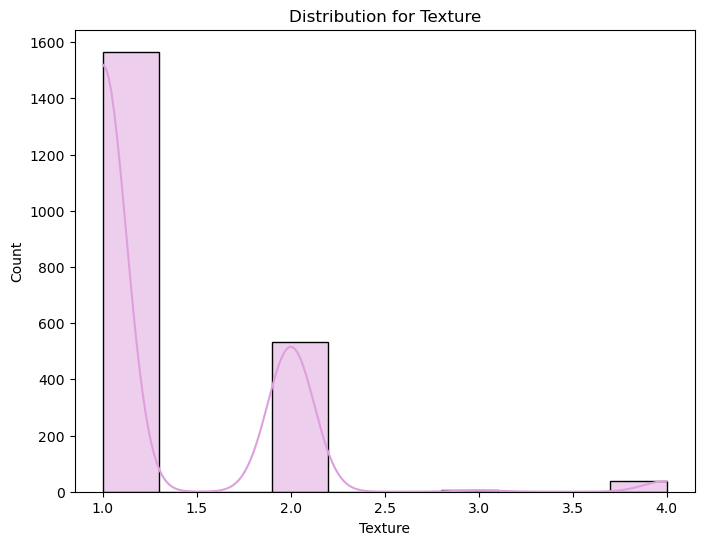

In [52]:
# Function for plotting histogram

def plot_histogram(feature, title, df, num_bins=10):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], bins=num_bins, kde=True, color="plum", edgecolor="k", linewidth=1)
    plt.title(title)
    plt.show()
    
plot_histogram("Texture","Distribution for Texture",df_prepared_texture)

In [53]:
df_prepared_texture["Texture"].value_counts()

1    1566
2     532
4      39
3       5
Name: Texture, dtype: int64

In [54]:
# Create target and feature dataframe
target_texture = df_prepared_texture["Texture"]
features_texture = df_prepared_texture.drop(columns="Texture")

# Standardise features for model (Excluding binary features)
columns_to_exclude = ["Blackbox", "Cypress pine", "Redgum"]
scaler =StandardScaler()
features_texture[features_texture.columns.difference(columns_to_exclude)] = scaler.fit_transform(features_texture[features_texture.columns.difference(columns_to_exclude)])


In [55]:
# import Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix,f1_score


import warnings
warnings.filterwarnings("ignore")

In [56]:
# Split Training and Testing dataset
x_train_texture,x_test_texture,y_train_texture,y_test_texture = train_test_split(features_texture,target_texture,test_size=0.2,random_state=0)


print(f"Number of entries in training dataset: {x_train_texture.shape[0]}")
print(f"Number of entries in testing dataset: {x_test_texture.shape[0]}")

Number of entries in training dataset: 1713
Number of entries in testing dataset: 429


# TEXTURE DISTRITBUTION & DATA PREPARATION SUMMARY

1. Order based on frequency from most to least: 
                                                1. 1 (1565 entries)
                                                2. 2 (532 entries)
                                                3. 4 (40 entries)
                                                4. 3 (5 entries)
                                                
2. Target feature "Texture" is separated from the dataset features.

3. The Feature (exluding the Target and Binary features) dataframe is standardised using Standard scaler which result in features having mean of 0 and standard deviation of 1.

4. The Binary features is excluded from the Standardisation as it is not necessary.

5. The dataset is split to training(80%) and testing(20%):
            Number of entries in training dataset: 1713
            Number of entries in testing dataset: 429

## 3.2 (TEXTURE) : MODEL EVALUATION (LOGISTIC REGRESSION )

In [57]:
# function for logistic Regression

def logistic_reg(x_train,x_test,y_train,y_test):
    
#     Create Logistic Regression Object
    model = LogisticRegression(random_state=0,max_iter=1000)
    
#     Train Model
    model.fit(x_train, y_train)
    
#     Predict using test dataset
    y_predict = model.predict(x_test)
    
#     Perform Accuracy test
    accuracy = accuracy_score(y_test, y_predict)
    
#     Generate Classification Report
    report_logistic = classification_report(y_test, y_predict)
    
    
#     Get Results
    return y_predict,accuracy, report_logistic

# Call function
y_predict_texture, accuracy_logistic, report_logistic_texture = logistic_reg(x_train_texture,x_test_texture,y_train_texture, y_test_texture)

print("--------THE RESULTS FOR LOGISTIC REGRESSION----------\n")
print(f"The Accuracy score for the Logistic Regression model:  {accuracy_logistic} \n\n")

print("Classification Report:")

print(report_logistic_texture)


--------THE RESULTS FOR LOGISTIC REGRESSION----------

The Accuracy score for the Logistic Regression model:  0.9603729603729604 


Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.96      0.98       311
           2       0.86      1.00      0.93       108
           3       0.00      0.00      0.00         2
           4       1.00      0.62      0.77         8

    accuracy                           0.96       429
   macro avg       0.72      0.65      0.67       429
weighted avg       0.96      0.96      0.96       429



## 3.3 (TEXTURE) : MODEL EVALUATION (DECISION TREE CLASSIFIER )

In [58]:
# load libraries
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [59]:
# Create a function to perform decision Tree Classifier
def decision_tree_classifier(x_train,x_test,y_train,y_test):
    
#     Create Decision Tree Regressor Model
    model = DecisionTreeClassifier(random_state=0)
    
#     Train Model using training dataset
    model.fit(x_train,y_train)
             
#         Use model on test dataset
    y_predicts = model.predict(x_test)
    
#     Get accuracy score
    dt_classifier_accuracy = accuracy_score(y_test_texture,y_predicts)
    
#     Get classification report
    report = classification_report(y_test_texture,y_predicts)
    
    print("--------THE RESULTS FOR DECISION TREE CLASSIFIER ----------\n")
    print(f"Accuracy Score: {dt_classifier_accuracy}\n\n")
    print(f"Classification Report:\n{report}")
     
#    call function
decision_tree_classifier(x_train_texture,x_test_texture,y_train_texture,y_test_texture)                                


--------THE RESULTS FOR DECISION TREE CLASSIFIER ----------

Accuracy Score: 0.9324009324009324


Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.95      0.96       311
           2       0.86      0.92      0.89       108
           3       0.00      0.00      0.00         2
           4       0.56      0.62      0.59         8

    accuracy                           0.93       429
   macro avg       0.60      0.62      0.61       429
weighted avg       0.93      0.93      0.93       429



## 3.4 (TEXTURE) : MODEL SELECTION USING GRIDSEARCH - LOGISTIC REGRESSION

In [60]:
# load libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [61]:
# Define a parameter grid to search
logistic_parameters = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'newton-cg', 'lbfgs'],
    'multi_class': ['ovr', 'multinomial'],
    'class_weight': ['balanced', None],
}

# Create a GridSearchCV object
logistic_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=999),  # Adjust max_iter as needed
    param_grid=logistic_parameters,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Use an appropriate scoring metric for your task
    n_jobs=-1,  # Use all available CPU cores for parallel processing
)

# Train GridSearch Model
logistic_search.fit(x_train_texture, y_train_texture)

#Get the Best Parameters
best_logistic_parameters = logistic_search.best_params_

# Get the best Score
best_logistic_score = logistic_search.best_score_

# Create new model using the best parameters
best_logistic_regression = LogisticRegression(max_iter=999, random_state=0, **best_logistic_parameters)

# train new model using the training dataset
best_logistic_regression.fit(x_train_texture, y_train_texture)

# make predictions using the new model on the testing dataset
y_predict_best_logistic = best_logistic_regression.predict(x_test_texture)

# Get accuracy scoring and create report
accuracy_score_best_logistic = accuracy_score(y_test_texture, y_predict_best_logistic)
report_best_logistic_regression = classification_report(y_test_texture, y_predict_best_logistic)

print("--------THE RESULTS FOR BEST LOGISTIC REGRESSION USING GRID SEARCH----------\n")
print(f"Hyper-parameter used: {best_logistic_regression}\n")
print(f"Accuracy Score: {accuracy_score_best_logistic}\n\n")
print(f"Classification Report:\n{report_best_logistic_regression}")
    

--------THE RESULTS FOR BEST LOGISTIC REGRESSION USING GRID SEARCH----------

Hyper-parameter used: LogisticRegression(C=10, max_iter=999, multi_class='ovr', penalty='l1',
                   random_state=0, solver='liblinear')

Accuracy Score: 0.9743589743589743


Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.99       311
           2       0.91      1.00      0.95       108
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         8

    accuracy                           0.97       429
   macro avg       0.73      0.74      0.73       429
weighted avg       0.97      0.97      0.97       429



## 3.5 (TEXTURE) : MODEL SELECTION USING RANDOMIZED SEARCH - LOGISTIC REGRESSION

In [62]:
# load Libraries
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

In [63]:
# Create function to perform Randomized Search 
def tune_logistic_regression_classifier(x_train, x_test, y_train, y_test):
    
    # Define Logistic Regression classifier and its hyperparameter grid
    classifier = LogisticRegression(solver='liblinear')
    
#     Define parameters
    param_dist = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
        'penalty': ['l1', 'l2'],  # Regularization penalty (L1 or L2)
        'fit_intercept': [True, False],  # Whether to fit the intercept term
        'class_weight': [None, 'balanced'],  # Class weights for imbalanced datasets
        'random_state': [42]
    }

    # Create a RandomizedSearchCV object
    random_search = RandomizedSearchCV(classifier, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)

    # Train the model with the training data
    random_search.fit(x_train, y_train)

    # Get the best hyperparameters and best estimator (parameters)
    best_params = random_search.best_params_
    best_classifier = random_search.best_estimator_

    # Get Prediction
    y_pred = best_classifier.predict(x_test)

#     Get Accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
#     Get Classification report
    report = classification_report(y_test, y_pred)
    
    print("--------THE RESULTS FOR BEST DECISION TREE CLASSIFIER USING RANDOMIZED SEARCH----------\n")
    print(f"Best Parameters: {best_params}\n")
    print(f"Accuracy Score: {accuracy}\n\n")
    print(f"Classification Report:\n{report}")

#     Call Function
tune_logistic_regression_classifier(x_train_texture, x_test_texture, y_train_texture, y_test_texture)



--------THE RESULTS FOR BEST DECISION TREE CLASSIFIER USING RANDOMIZED SEARCH----------

Best Parameters: {'random_state': 42, 'penalty': 'l2', 'fit_intercept': False, 'class_weight': None, 'C': 100}

Accuracy Score: 0.9743589743589743


Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.99       311
           2       0.91      1.00      0.95       108
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00         8

    accuracy                           0.97       429
   macro avg       0.73      0.74      0.73       429
weighted avg       0.97      0.97      0.97       429



## 3.6 (TEXTURE) : MODEL SELECTION USING GRIDSEARCH - DECISION TREE CLASSIFIER

In [64]:
# Create function to perform grid search for decision tree classifier model
def best_decision_tree_model(x_train, x_test, y_train, y_test):
    
#     define parameters
    param = {
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4, 8],
        'max_leaf_nodes': [None, 10, 20],  # Add a comma here
        'min_impurity_decrease': [0.0, 0.1, 0.2],
        'class_weight': [None, 'balanced']
    }

#     Create gridsearch model
    gridsearch = GridSearchCV(DecisionTreeClassifier(random_state=0), param, cv=5, scoring="accuracy")

#     Train Model
    gridsearch.fit(x_train, y_train)

#     Get the best Parameters and accuracy Score
    best_param = gridsearch.best_params_
    best_score = gridsearch.best_score_

#     Create new Decision tree classifier object with best parameters
    model = DecisionTreeClassifier(random_state=0, **best_param)

#     Train new model
    model.fit(x_train, y_train)

#     Get prediction using the test dataset
    y_predict = model.predict(x_test)

#     Get accuracy score
    accuracy = accuracy_score(y_test, y_predict)

#     Get classification report
    report = classification_report(y_test, y_predict)

    print("--------THE RESULTS FOR BEST DECISION TREE CLASSIFIER USING GRID SEARCH----------\n")
    print(f"Best Parameters: {best_param}\n")
    print(f"Accuracy Score: {accuracy}\n\n")
    print(f"Classification Report:\n{report}")

#     Call function
best_decision_tree_model(x_train_texture, x_test_texture, y_train_texture, y_test_texture)


--------THE RESULTS FOR BEST DECISION TREE CLASSIFIER USING GRID SEARCH----------

Best Parameters: {'class_weight': None, 'max_depth': 5, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 1, 'min_samples_split': 2}

Accuracy Score: 0.9254079254079254


Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.96       311
           2       0.77      1.00      0.87       108
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         8

    accuracy                           0.93       429
   macro avg       0.44      0.48      0.46       429
weighted avg       0.92      0.93      0.92       429



## 3.7 (TEXTURE) : MODEL EVALUATION USING RANDOMIZED SEARCH- DECISION TREE CLASSIFIER

In [65]:
# load libraries
from sklearn.model_selection import RandomizedSearchCV 

In [66]:
# Create a function to perform Randomized Search
def tune_decision_tree_classifier(x_train, x_test, y_train, y_test):
    # Define your Decision Tree classifier and its hyperparameter grid
    classifier = DecisionTreeClassifier()
    param_dist = {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'random_state': [42]
    }

    # Create a RandomizedSearchCV object
    random_search = RandomizedSearchCV(classifier, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)

    # train the RandomizedSearchCV to your training data
    random_search.fit(x_train, y_train)

    # get the best hyperparameters and best estimator
    best_params = random_search.best_params_
    best_classifier = random_search.best_estimator_

    # Use the best classifier for prediction
    y_pred = best_classifier.predict(x_test)

    # get accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
#     get classification Report
    report = classification_report(y_test, y_pred)
    
    print("--------THE RESULTS FOR BEST DECISION TREE CLASSIFIER USING RANDOMIZED SEARCH----------\n")
    print(f"Best Parameters: {best_params}\n")
    print(f"Accuracy Score: {accuracy}\n\n")
    print(f"Classification Report:\n{report}")

#     Call function
tune_decision_tree_classifier(x_train_texture, x_test_texture, y_train_texture, y_test_texture)



--------THE RESULTS FOR BEST DECISION TREE CLASSIFIER USING RANDOMIZED SEARCH----------

Best Parameters: {'splitter': 'random', 'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'entropy'}

Accuracy Score: 0.9184149184149184


Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.95      0.96       311
           2       0.81      0.89      0.85       108
           3       0.00      0.00      0.00         2
           4       0.40      0.25      0.31         8

    accuracy                           0.92       429
   macro avg       0.55      0.52      0.53       429
weighted avg       0.91      0.92      0.92       429



# MODEL SELECTION SUMMARY

 ## Model Evaluation
 
### 1. LOGISTIC REGRESSION

1. the accuracy score for logisctic regression is 0.95.The score suggest that 95% of the predictions on the test dataset is accurate. 

### 2. Decision Tree Classifier

1. The accuracy score for decision tree classifier is 0.91. THe score indicates that only 91% of the prediction on the test dataset is accurate.

### Conclusion for Model Evaluation

The results strongly suggest that logistic regression model performed better than the Decision tree classifier model without any hyper-parameter tuning

## Model Selection

### 1. LOGISTIC REGRESSION

#### GridSearch

1. The logistic regession model after hyper-parameter tunning using the gridsearch best parameters resulted in a accuracy score of 0.97/97%.The logistic regression model performed 2% better.

2. the best parameters using gridsearch: (C=10, max_iter=999, multi_class='multinomial', solver='newton-cg')

#### Randomized Search

1. The logistic regression model after hyper-parameter tunning using randomized searh best parameter resulted in a accuracy score of 0.96. The logistic regression model performed 1% better but still is not as good as the gridsearch result.

2. The best paramter using randomized search : { 'penalty': 'l2', 'fit_intercept': False, 'class_weight': None, 'C': 100}

### 2. DECISION TREE CLASSIFIER

#### GridSearch

1. The Decision tree classifier model after hyper-parameter tuning using gridsearch best parameter resulted in a accuracy score of 0.93/93%. the model performed 2% better compared to no hyper-parameter tunning.

2. The best parameter using Gridsearch: {'class_weight': None, 'max_depth': 5, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 8, 'min_samples_split': 2}


#### Randomized Search

1. The decision tree classifier model after hyper-parameter tunning using randomized search best parameter resulted in a accuracy score of 0.93. the model performed 2% better compared to no hyper-parameter tunning.

2. The best parameter using Randomized search: {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10, 'criterion': 'entropy'}

### Model Selection Conclusion

1. The best Hyper-parameter for Logistic Regression: (C=10, max_iter=999, multi_class='multinomial', solver='newton-cg')

2. The best Hyper-parameter for Decision tree classifer : {'class_weight': None, 'max_depth': 5, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 8, 'min_samples_split': 2}

3. The Best Model for Texture prediction is Logistic Regression using the parameters: (C=10, max_iter=999, multi_class='multinomial', solver='newton-cg'). Accuracy score of 0.97.


# PART 4 : MODEL SELECTION AND EVALUATION (Stability)

## PART 4.1 (STABILITY) : DATA PREPARATION

In [67]:
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142 entries, 0 to 2254
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Resist         2142 non-null   int64  
 1   Resist_adjust  2142 non-null   float64
 2   Broke          2142 non-null   int64  
 3   Stab           2142 non-null   int64  
 4   Biocrust       2142 non-null   float64
 5   Biocrust_code  2142 non-null   int64  
 6   Foliage        2142 non-null   float64
 7   Foliage_code   2142 non-null   int64  
 8   Litter%        2142 non-null   float64
 9   Litter_code    2142 non-null   int64  
 10  Litt_depth     2142 non-null   float64
 11  Litt_Propn     2142 non-null   float64
 12  Litt_Complex   2142 non-null   float64
 13  Stability      2142 non-null   float64
 14  Infiltration   2142 non-null   float64
 15  Nutrients      2142 non-null   float64
 16  Blackbox       2142 non-null   uint8  
 17  Cypress pine   2142 non-null   uint8  
 18  Redgum  

In [68]:
df_prepared.head(3)

,Resist,Resist_adjust,Broke,Stab,Biocrust,Biocrust_code,Foliage,Foliage_code,Litter%,Litter_code,Litt_depth,Litt_Propn,Litt_Complex,Stability,Infiltration,Nutrients,Blackbox,Cypress pine,Redgum
0,4,1.0,2,4,5.0,2,45.0,4,5.0,1,3.0,95.0,1.5,54.107231,20.550760,15.116279,0,1,0
1,4,1.0,4,4,20.0,3,40.0,4,25.0,2,4.0,30.0,3.0,63.944909,22.605836,20.930233,0,1,0
2,4,1.0,4,4,10.0,2,85.0,5,10.0,2,0.5,100.0,3.0,63.944909,20.550760,16.279070,0,1,0


In [69]:
# statistical analysis for Stability
df_prepared["Stability"].describe()

count    2142.000000
mean       59.028366
std         8.561355
min        27.053615
25%        54.107231
50%        59.026070
75%        64.756517
max        80.324643
Name: Stability, dtype: float64

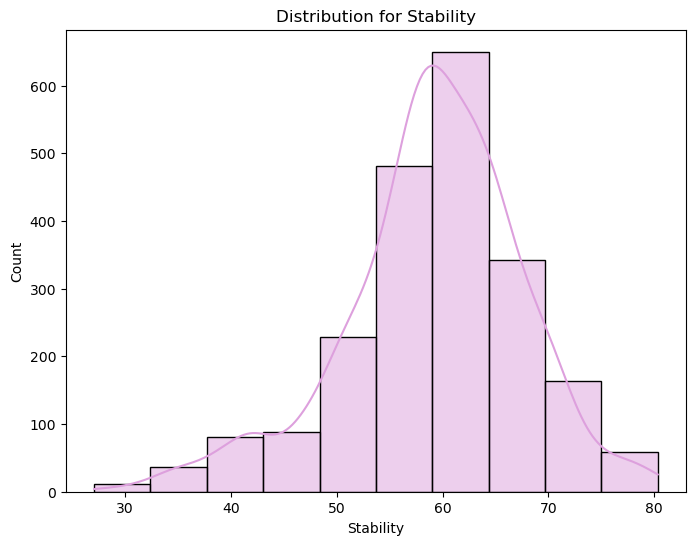

In [70]:
# visualise the data
plot_histogram("Stability","Distribution for Stability",df_prepared)

In [71]:
# Create target and features dataframe
target_stability = df_prepared["Stability"]
features_stability = df_prepared.drop(columns="Stability")

# Standardise features for model (Excluding binary features)
columns_to_exclude = ["Blackbox", "Cypress pine", "Redgum"]
scaler =StandardScaler()
features_stability[features_stability.columns.difference(columns_to_exclude)] = scaler.fit_transform(features_stability[features_stability.columns.difference(columns_to_exclude)])


In [73]:
features_stability.head(5)

,Resist,Resist_adjust,Broke,Stab,Biocrust,Biocrust_code,Foliage,Foliage_code,Litter%,Litter_code,Litt_depth,Litt_Propn,Litt_Complex,Infiltration,Nutrients,Blackbox,Cypress pine,Redgum
0,0.856167,-1.044514,-0.567352,0.892954,-0.176382,0.705400,1.557169,1.372122,-1.546581,-1.809954,-0.746203,1.714447,-1.515612,-0.993375,-1.506904,0,1,0
1,0.856167,-1.044514,1.021234,0.892954,0.721774,1.482647,1.295283,1.372122,-0.913836,-1.091074,-0.648092,-0.121538,-1.085512,-0.631103,-0.768054,0,1,0
2,0.856167,-1.044514,1.021234,0.892954,0.123003,0.705400,3.652255,2.288010,-1.388395,-1.091074,-0.991479,1.855676,-1.085512,-0.993375,-1.359134,0,1,0
3,0.856167,-1.044514,1.021234,0.098640,0.721774,1.482647,3.128484,2.288010,-1.546581,-1.809954,-0.991479,1.855676,-1.515612,-1.717921,-1.506904,0,1,0
4,0.856167,-1.044514,0.226941,0.892954,1.320545,1.482647,0.247740,0.456234,-1.546581,-1.809954,-0.942423,1.855676,-1.515612,-1.355648,-1.506904,0,1,0


In [74]:

# Split Training and Testing dataset
x_train_stability,x_test_stability,y_train_stability,y_test_stability = train_test_split(features_stability,target_stability,test_size=0.2,random_state=0)

print(f"Number of entries in training dataset: {x_train_stability.shape[0]}")
print(f"Number of entries in testing dataset: {x_test_stability.shape[0]}")

Number of entries in training dataset: 1713
Number of entries in testing dataset: 429


In [84]:
y_test_stability.shape

(429,)

# Stability Distribution & Data Preparation Summary

**1. Statistical Distribution of Stability:**
- Count: 2142
- Mean: 59.198643
- Standard Deviation: 8.368245
- Min: 29.513035
- 25th Percentile: 54.918839
- Median (50th Percentile): 59.837678
- 75th Percentile: 64.756517
- Max: 80.324643

**2. Target Feature "Stability" is Separated from the Dataset Features.**

**3. The Feature (excluding the Target and Binary features) Dataframe is Standardized using Standard Scaler, resulting in features having a mean of 0 and a standard deviation of 1.**

**4. The Binary Features are Excluded from the Standardization as They are Not Necessary.**

**5. The Dataset is Split into Training (80%) and Testing (20%):**
- Number of Entries in Training Dataset: 1713
- Number of Entries in Testing Dataset: 429


## PART 4.2 (STABILITY) : MODEL EVALUATION - LINEAR REGRESSION

In [85]:
# load library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


-------RESULTS FOR LINEAR REGRESSION---------

Mean Absolute Error: 0.8775645067714708

Mean Squared Error: 1.990222375178765
 
Root Mean Squared Error: 1.4107524145571275

R-squared (R2) Score: 0.974990832655131



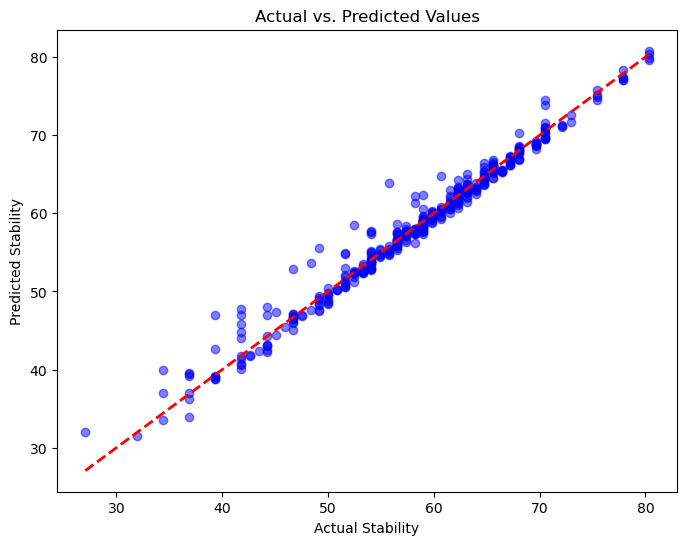

In [89]:
# Create function to perform linear regression
def linear_regressor(x_train, x_test, y_train, y_test):
    
#     Create linear regression object
    model = LinearRegression()
    
#     train model with training dataset
    model.fit(x_train, y_train)
    
#     Get prediction using the model on the test dataset
    y_predict = model.predict(x_test)
    
#     Get the Scoring matrix 
    mae = mean_absolute_error(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predict)

    print("-------RESULTS FOR LINEAR REGRESSION---------\n")
    print(f"Mean Absolute Error: {mae}\n")
    print(f"Mean Squared Error: {mse}\n ")
    print(f"Root Mean Squared Error: {rmse}\n")
    print(f"R-squared (R2) Score: {r2}\n")
    
#     Plot Graph which compares the actual target and the predicted target. ( Blue = Predicted, red = Actual)
    plt.figure(figsize=(8, 6))
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', c='r', linewidth=2, label='Ideal')
    plt.scatter(y_test, y_predict, c='b', marker='o', alpha=0.5, label='Predicted Stability')
    plt.title('Actual vs. Predicted Values')
    plt.xlabel("Actual Stability")
    plt.ylabel("Predicted Stability")
    plt.show()
    
    

# Example usage:
linear_regressor(x_train_stability, x_test_stability, y_train_stability, y_test_stability)


## PART 4.3 (STABILITY) : MODEL EVALUATION - DECISION TREE REGRESSION

In [90]:
# load libraries
from sklearn.tree import DecisionTreeRegressor

------RESULTS FOR DECISION TREE REGRESSION

Mean Absolute Error: 1.84364741669218

Mean Squared Error: 8.340038740424509
 
Root Mean Squared Error: 2.8879125229868907

R-squared (R2) Score: 0.8951989349917582



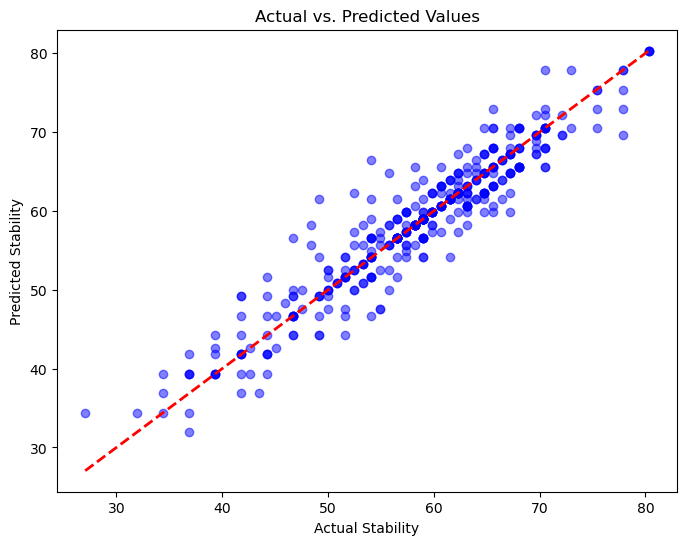

In [91]:
# Create function to perform Decision Tree regression
def decision_tree_regressor(x_train, x_test, y_train, y_test):
    
#     Create decision tree regressor object
    model = DecisionTreeRegressor(random_state=0)
    
#     Train model using training dataset
    model.fit(x_train,y_train)
    
#     use model to make predictions
    y_predict = model.predict(x_test)
    
#     Get Scoring matrix
    mae = mean_absolute_error(y_test, y_predict) 
    mse = mean_squared_error(y_test, y_predict)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_predict)
    
    print("------RESULTS FOR DECISION TREE REGRESSION\n")
    print(f"Mean Absolute Error: {mae}\n")
    print(f"Mean Squared Error: {mse}\n ")
    print(f"Root Mean Squared Error: {rmse}\n")
    print(f"R-squared (R2) Score: {r2}\n")
    
#     Plot Graph which compares the actual target and the predicted target. ( Blue = Predicted, red = Actual)   
    plt.figure(figsize=(8, 6))
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', c='r', linewidth=2, label='Ideal')
    plt.scatter(y_test, y_predict, c='b', marker='o', alpha=0.5, label='Predicted Stability')
    plt.title('Actual vs. Predicted Values')
    plt.xlabel("Actual Stability")
    plt.ylabel("Predicted Stability")
    plt.show()

# Call function
decision_tree_regressor(x_train_stability, x_test_stability, y_train_stability, y_test_stability)


## PART 4.4 (STABILITY) : MODEL SELECTION - LINEAR REGRESSION USING GRID SEARCH

--------RESULTS FOR BEST Linear Regression USING GRID SEARCH----------

Best Parameters: {'fit_intercept': True}
Mean Absolute Error: 0.87756451
Mean Squared Error: 1.9902223752
R-squared (R²) Score: 0.97499083


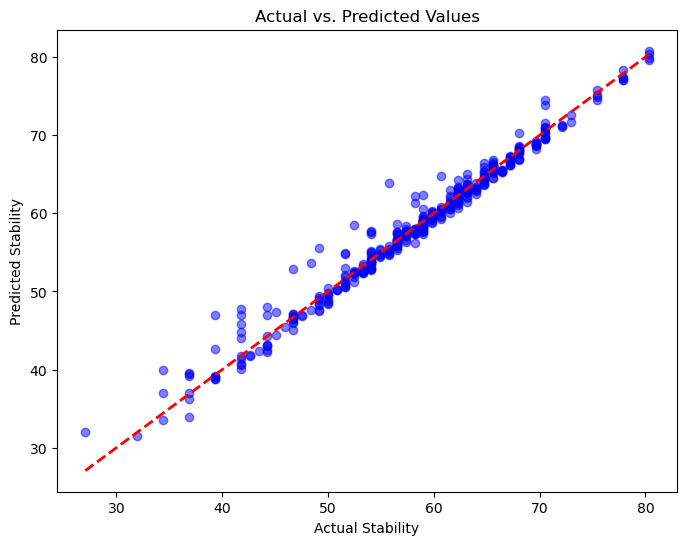

In [103]:
# Create function to perform Gridsearch for linear regression and decision tree regressor
def best_gridsearch(model, param_grid, model_name,x_train,x_test,y_train, y_test):
    
#     Create gridsearch object with the desired model
    grid_search = GridSearchCV(model, param_grid, cv=5,scoring='neg_mean_squared_error', n_jobs=-1)
    
#     fit training dataset with the gridsearch model
    grid_search.fit(x_train, y_train)
    
#     Get the Best parameters
    best_params = grid_search.best_params_
    
#     Create a new model with the bes parameters
    best_model = model.set_params(**best_params)
    
#     Train new model using training dataset
    best_model.fit(x_train, y_train)
    
#     Get prediction using new model
    y_predict = best_model.predict(x_test)
    
#     Get scoring matrics
    mae = mean_absolute_error(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)
    
    print(f"--------RESULTS FOR BEST {model_name} USING GRID SEARCH----------\n")
    print(f"Best Parameters: {best_params}")
    print(f"Mean Absolute Error: {mae:.8f}")
    print(f"Mean Squared Error: {mse:.10f}")
    print(f"R-squared (R²) Score: {r2:.8f}")
    
#     Plot Graph which compares the actual target and the predicted target. ( Blue = Predicted, red = Actual)
    plt.figure(figsize=(8, 6))
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', c='r', linewidth=2, label='Ideal')
    plt.scatter(y_test, y_predict, c='b', marker='o', alpha=0.5, label='Predicted Stability')
    plt.title('Actual vs. Predicted Values')
    plt.xlabel("Actual Stability")
    plt.ylabel("Predicted Stability")
    plt.show()
    
    return y_predict

# define parameters for grid search for linear regression
linear_reg_param = {
    'fit_intercept': [True, False]} 


# call function for linear regression (y1 store the predicted y)
y1 = best_gridsearch(LinearRegression(),linear_reg_param,"Linear Regression",x_train_stability,x_test_stability,y_train_stability,y_test_stability)

In [104]:
# Save Results on CSV
EXPORT = x_test_stability.copy()
EXPORT["actual Stability"] = y_test_stability
EXPORT["predicted Stability"] = y1
EXPORT.to_csv("Stability_prediction",index=False)

## PART 4.5 (STABILITY) : MODEL SELECTION - LINEAR REGRESSION USING RANDOMIZED SEARCH

In [98]:
# Create Funtion for Randomized search for linear regression
def tune_linear_regression(x_train, y_train, x_test, y_test):
    
    # Create Linear Regression model and its hyperparameter grid
    model = LinearRegression()

    # define parameters
    linear_reg_param = {'fit_intercept': [True, False]} 
        
    # Create a RandomizedSearchCV object (no hyperparameters to search over)
    random_search = RandomizedSearchCV(model, linear_reg_param, n_iter=1, cv=5, n_jobs=-1, random_state=42)

    # Fit the RandomizedSearchCV to your training data
    random_search.fit(x_train, y_train)

    # Get the best model parameters and create new best linear regression model using new parameters
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_

    # Make predictions using the best model
    y_predict = best_model.predict(x_test)
    
#     Get Scoring matrics 
    mae = mean_absolute_error(y_test, y_predict)
    mse = mean_squared_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)
    
    print(f"--------RESULTS FOR BEST LINEAR REGRESSION USING RANDOMIZED SEARCH----------\n")
    print(f"Best Parameters: {best_params}")
    print(f"Mean Absolute Error: {mae:.8f}")
    print(f"Mean Squared Error: {mse:.10f}")
    print(f"R-squared (R²) Score: {r2:.8f}")
    
# Call function
tune_linear_regression(x_train_stability, y_train_stability, x_test_stability, y_test_stability)


--------RESULTS FOR BEST LINEAR REGRESSION USING RANDOMIZED SEARCH----------

Best Parameters: {'fit_intercept': False}
Mean Absolute Error: 0.87756451
Mean Squared Error: 1.9902223752
R-squared (R²) Score: 0.97499083


## PART 4.6 (STABILITY) : MODEL EVALUATION - DECISION TREE REGRESSION

In [99]:
# Define parameters for gridsearch for decsion tree regression
decision_tree_reg_param = {
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

--------RESULTS FOR BEST Decision Tree Regression USING GRID SEARCH----------

Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mean Absolute Error: 1.94076487
Mean Squared Error: 7.4971851533
R-squared (R²) Score: 0.90579025


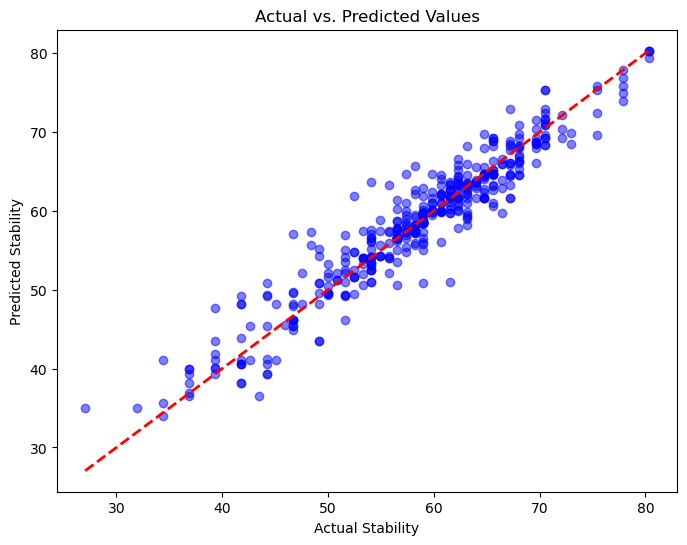

In [100]:
# Call function for gridsearch for Decision tree regression
best_gridsearch(DecisionTreeRegressor(random_state=0),decision_tree_reg_param,"Decision Tree Regression",x_train_stability,x_test_stability,y_train_stability,y_test_stability)

## PART 4.7 (STABILITY) : MODEL SELECTION- DECISION TREE REGRESSION USING RANDOMIZED SEARCH

In [101]:
# load libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

In [102]:
# Create function to perform randomized search for decision tree regression
def tune_decision_tree_regression(x_train, y_train, x_test, y_test):
    
    # Define your Decision Tree Regressor and its hyperparameter grid
    model = DecisionTreeRegressor()
    param_dist = {
        'max_depth': [None, 10, 20, 30, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']}
    

    # Create a RandomizedSearchCV object
    random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)

    # Fit the RandomizedSearchCV to your training data
    random_search.fit(x_train, y_train)

    # Get the best model and best hyperparameters
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_

    # Make predictions on the test data
    y_pred = best_model.predict(x_test)

    # Calculate mean absolute error, mean squared error, and R-squared (R2) score
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"--------RESULTS FOR BEST DECISION TREE REGRESSION USING RANDOMIZED SEARCH----------\n")
    print(f"Best Parameters: {best_params}")
    print(f"Mean Absolute Error: {mae:.8f}")
    print(f"Mean Squared Error: {mse:.10f}")
    print(f"R-squared (R²) Score: {r2:.8f}")

# call function
tune_decision_tree_regression(x_train_stability, y_train_stability, x_test_stability, y_test_stability)


--------RESULTS FOR BEST DECISION TREE REGRESSION USING RANDOMIZED SEARCH----------

Best Parameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 20}
Mean Absolute Error: 1.89330206
Mean Squared Error: 7.1297633558
R-squared (R²) Score: 0.91040728


# STABILITY MODEL SELECTION SUMMARY

## Model Evaluation

### 1. LINEAR REGRESSION

1. **Mean Absolute Error (MAE):** 0.8775645067714708
   - MAE is the absolute mean difference between the actual and predicted results.
   - Lower scores indicate better model performance.
   

2. **Mean Squared Error (MSE):**1.990222375178765
   - MSE is the mean difference between the actual and predicted results.
   - Lower scores indicate better performance.
   
3. **Root Mean Squared Error (RMSE):** 1.4107524145571275
   - RMSE is the square root of the MSE.
   - lower scores indicate better performance

4. **R-squared (R²):** 0.974990832655131
   - R² is the variance in the target variable.
   - the closer to 1, the better the performance. 0.97 indicates that the        model fits well with the data.
### 2. DECISION TREE REGRESSOR

1. **Mean Absolute Error (MAE):** 1.84364741669218
   - MAE is the absolute mean difference between the actual and predicted results.
   -Linear regression model mae is lower than 1.8 which suggest decision tree regressor is not optimal
   

2. **Mean Squared Error (MSE):** 8.340038740424509
   - MSE is the mean difference between the actual and predicted results.
   - The linear regression model has a lower mse which indicates that decision tree model is not optimal
 
  
3. **Root Mean Squared Error (RMSE):** 2.8879125229868907
   - RMSE is the square root of the MSE.
   - the rmse for linear regression model is lower than the decision tree regressor model which suggest that decision tree model is not optimal
 

4. **R-squared (R²):**  0.8951989349917582
   - R² measures the variance in the target variable.
   - the r2 result is high, however, linear regression model have a higher r2 result which indicates that the decision tree model is not optimal.
### Conclusion for Model Evaluation

- linear regression model results are better than decision tree regression model results.

## Model Selection

### 1. LINEAR REGRESSION

#### GridSearch

1. After hyper-parameter tuning using GridSearch, the Linear Regression model's best parameters result in:
   - Mean Absolute Error:0.87756451
   - Mean Squared Error: 1.9902223752
   - R-squared (R²) Score:0.97499083

2. The best parameter using GridSearch: {'fit_intercept': True}

#### Randomized Search

1. After hyper-parameter tuning using Randomized Search, the Linear Regression model's best parameters result in:
   - Mean Absolute Error: 0.87756451
   - Mean Squared Error:1.9902223752
   - R-squared (R²) Score:0.97499083

2. The best parameter using Randomized Search: {'fit_intercept': False}

### 2. DECISION TREE REGRESSOR

#### GridSearch

1. After hyper-parameter tuning using GridSearch, the Decision Tree Regressor model's best parameters result in:
   - Mean Absolute Error: 1.94076487
   - Mean Squared Error: 7.4971851533
   - R-squared (R²) Score: 0.90579025

2. The best parameter using GridSearch: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
#### Randomized Search

1. After hyper-parameter tuning using Randomized Search, the Decision Tree Regressor model's best parameters result in:
   - Mean Absolute Error: 1.89330206
   - Mean Squared Error: 7.1297633558
   - R-squared (R²) Score: 0.91040728

2. The best parameter using Randomized Search: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 20}
### Model Selection Conclusion

1. The best Hyper-parameters for Linear Regression: {'fit_intercept': True}

2. The best Hyper-parameters for Decision Tree Regressor: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 20}

3. The Best Model for Stability is the Linear Regression model using these parameters: {'fit_intercept': False} as it has a low mse,mae and a higher r2 score.